![Banner](../media/banner2.png)

---

# Workshop 2.2: <font color=peru>Visualization in Jupyter Notebooks</font>

* **Contributors**:
    * Ashwin Patil (@ashwinpatil)
    * Jose Rodriguez (@Cyb3rPandah)
    * Ian Hellen (@ianhellen)
<br><br>

* **Agenda**:
    * [Basic plotting with pandas and matplotlib](#pandas)
    * [HVPlot, Holoviews and Bokeh](#hvplot)
    * [Seaborn - specialized stats plots and more](#seaborn)
    * [Plotly](#plotly)
    * [MSTICPy Visualizations](#msticpy)
<br><br>
* **Notebook**: https://aka.ms/Jupyterthon-ws-2-2
* **License**: [Creative Commons Attribution-ShareAlike 4.0 International](https://creativecommons.org/licenses/by-sa/4.0/)

* **Q&A** - OTR Discord **#Jupyterthon #WORKSHOP DAY 2 - VISUALIZING DATA**

## Disclaimer:
This is not intended to be a comprehensive overview of Visualization in
Python/Jupyter. There are many libraries and techniques not covered here.
These are just a few options that we've used and liked and give you
a lot of scope.


---

# <a style="border: solid; padding:5pt; color:black; background-color:#90CAF9" name="pandas">Basic plotting with pandas using Matplotlib</a>

**Resources:**
- [Plotting with matplotlib](https://pandas.pydata.org/pandas-docs/version/0.13/visualization.html)
- [Matplotlib API Docs](https://matplotlib.org/stable/api/index.html)

**Cheatsheets :** 
- [Matplotlib Cheatsheet-2](https://matplotlib.org/cheatsheets/_images/cheatsheets-2.png)
- [Matplotlib Beginner](https://matplotlib.org/cheatsheets/_images/handout-beginner.png)
- [Matplotlib Intermediate](https://matplotlib.org/cheatsheets/_images/handout-intermediate.png)
- [Matplotlib Tips](https://matplotlib.org/cheatsheets/_images/handout-tips.png)

![](https://matplotlib.org/stable/_static/logo2.svg)

### Matplotlib Cheatsheets

![](https://matplotlib.org/cheatsheets/_images/cheatsheets-1.png)


### Bar charts 
Refer [Bar Plots](https://pandas.pydata.org/pandas-docs/version/0.13/visualization.html#bar-plots) section for more examples and options to customize

In [14]:
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
import pandas as pd
logons_full_df = pd.read_pickle("../data/host_logons.pkl")
net_full_df = pd.read_pickle("../data/az_net_comms_df.pkl")

In [3]:
logons_full_df.head()

Account  EventID           TimeGenerated  \
0         NT AUTHORITY\SYSTEM     4624 2019-02-12 04:56:34.307   
1  MSTICAlertsWin1\MSTICAdmin     4624 2019-02-12 04:37:25.340   
2  MSTICAlertsWin1\MSTICAdmin     4624 2019-02-12 04:37:27.997   
3  MSTICAlertsWin1\MSTICAdmin     4624 2019-02-12 04:38:16.550   
4  MSTICAlertsWin1\MSTICAdmin     4624 2019-02-12 04:38:21.370   

          Computer   SubjectUserName SubjectDomainName SubjectUserSid  \
0  MSTICAlertsWin1  MSTICAlertsWin1$         WORKGROUP       S-1-5-18   
1  MSTICAlertsWin1                 -                 -        S-1-0-0   
2  MSTICAlertsWin1                 -                 -        S-1-0-0   
3  MSTICAlertsWin1                 -                 -        S-1-0-0   
4  MSTICAlertsWin1                 -                 -        S-1-0-0   

  TargetUserName TargetDomainName  \
0         SYSTEM     NT AUTHORITY   
1     MSTICAdmin  MSTICAlertsWin1   
2     MSTICAdmin  MSTICAlertsWin1   
3     MSTICAdmin  MSTICAlertsWin1   
4     MSTICAdmin  MSTICAlertsWin1   

                                  TargetUserSid TargetLogonId  LogonType  \
0                                      S-1-5-18         0x3e7          5   
1  S-1-5-21-996632719-2361334927-4038480536-500     0xc90e957          3   
2  S-1-5-21-996632719-2361334927-4038480536-500     0xc90ea44          3   
3  S-1-5-21-996632719-2361334927-4038480536-500     0xc912d62          3   
4  S-1-5-21-996632719-2361334927-4038480536-500     0xc913737          3   

         IpAddress WorkstationName          TimeCreatedUtc  
0                -               - 2019-02-12 04:56:34.307  
1  131.107.147.209  IANHELLE-DEV17 2019-02-12 04:37:25.340  
2  131.107.147.209  IANHELLE-DEV17 2019-02-12 04:37:27.997  
3  131.107.147.209  IANHELLE-DEV17 2019-02-12 04:38:16.550  
4  131.107.147.209  IANHELLE-DEV17 2019-02-12 04:38:21.370

In [15]:
# Preprocess the data- Group by LogonType and count the no of accounts
logontypebyacc = logons_full_df.groupby(['LogonType'])['Account'].count()
logontypebyacc.head()

LogonType
0      2
2     12
3     13
4      9
5    126
Name: Account, dtype: int64

<AxesSubplot:xlabel='LogonType'>

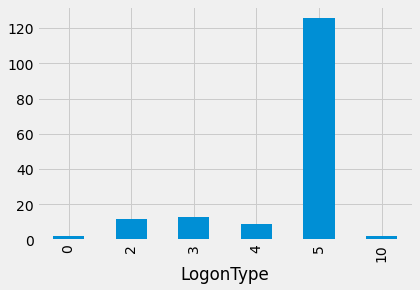

In [5]:
logontypebyacc.plot(kind='bar')

### Line charts 

In [6]:
#Preprocess dataframe by 
logonaccountbyday = logons_full_df.set_index('TimeGenerated').resample('D')['Account'].count()
logonaccountbyday.head()

TimeGenerated
2019-02-09     3
2019-02-10    11
2019-02-11     6
2019-02-12    72
2019-02-13    15
Freq: D, Name: Account, dtype: int64

<AxesSubplot:xlabel='TimeGenerated'>

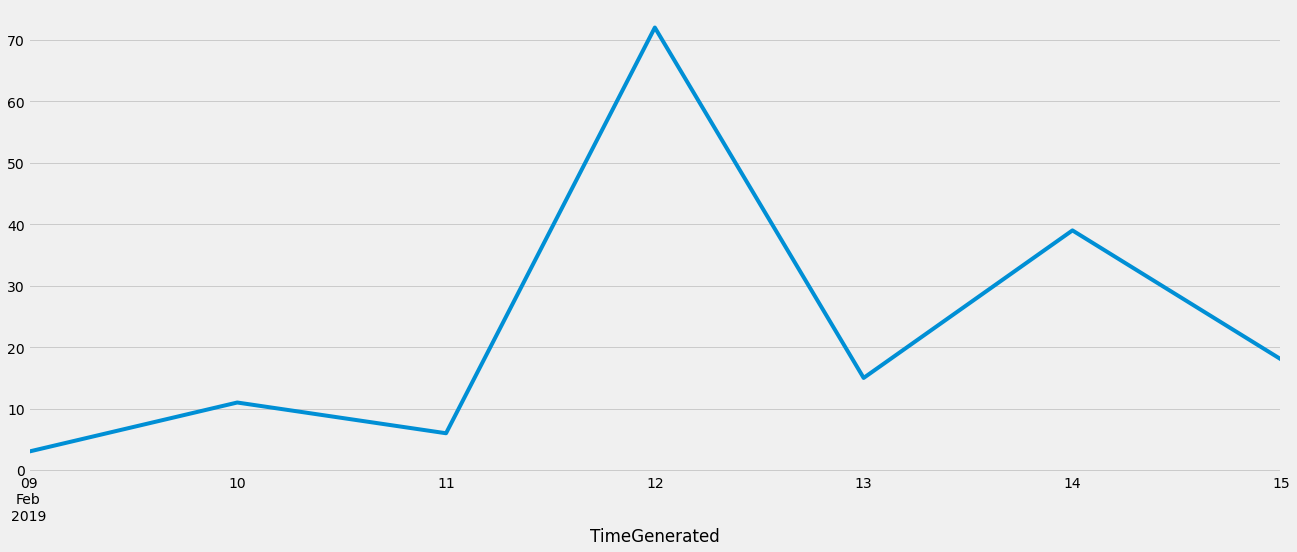

In [7]:
logonaccountbyday.plot(figsize = (20,8))

### Customizations

Annotate your charts by adding texts, labels and other customizations.

Docs: 
- [Plot API](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)
- [Annotate](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.annotate.html)
- [Advanced Annotate](https://matplotlib.org/stable/tutorials/text/annotations.html#plotting-guide-annotation)

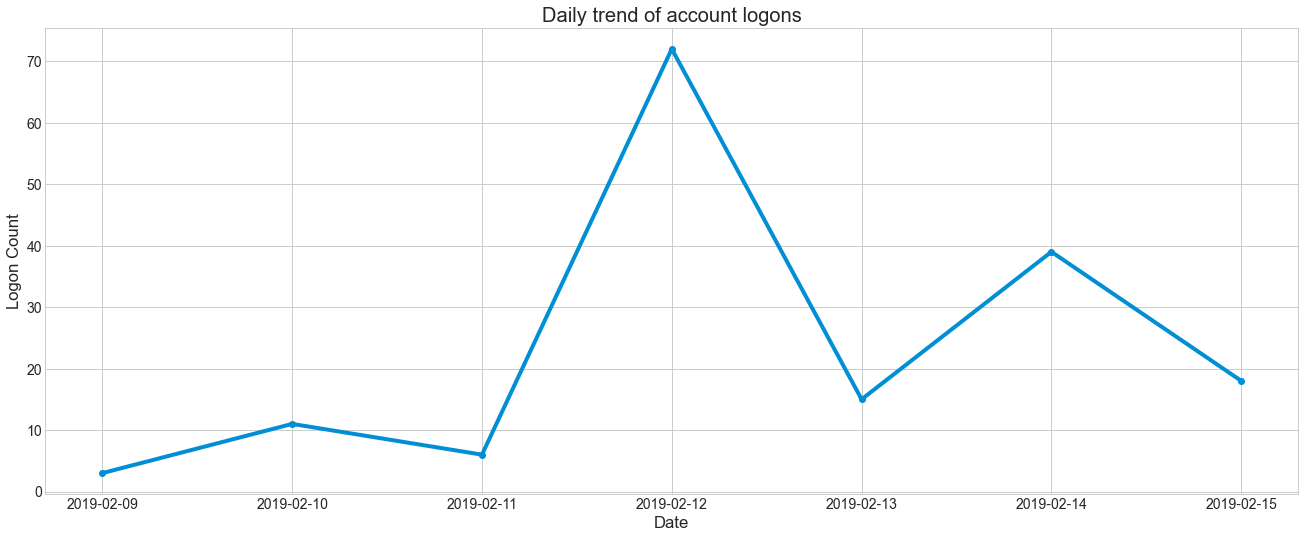

In [8]:
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")

plt.figure(figsize = (20,8))
plt.plot(logonaccountbyday, marker='o')
plt.title("Daily trend of account logons")
plt.xlabel("Date")
plt.ylabel("Logon Count")

# another example of customization with plot
# plt.plot(logonaccountbyday, color='green', marker='o', linestyle='dashed',linewidth=2)

plt.show()

---

# <a style="border: solid; padding:5pt; color:black; background-color:#90CAF9" name="hvplot">Hvplot, Bokeh made easy(ier)</a>

![Holoviews](../media/Holoviews.png)

### Bokeh
is a very flexible JS visualization framework. Beautiful interactive charts but somewhat complex.

Example [Bokeh Ridge plot](https://docs.bokeh.org/en/latest/docs/gallery/ridgeplot.html)

### HoloViews
is a higherlevel, declarative layer built on top of Bokeh (or MatplotLib)

Example [Holoviews Violin plot](https://holoviews.org/gallery/demos/bokeh/energy_sankey.html#demos-bokeh-gallery-energy-sankey)

### HVplot (HV == Holoviews)
is some of Holoviews functionality implemented
as a pandas extension.

### Installing and loading
```
conda install -c pyviz hvplot
```
```
pip install hvplot
```
### Examples

In [9]:
import hvplot.pandas

count_of_logons = logons_full_df[["TimeGenerated", "Account"]].groupby("Account").count()
count_of_logons.hvplot.barh(height=300)


:Bars   [Account]   (TimeGenerated)

In [10]:
plot_df = (
    net_full_df[["L7Protocol", "AllExtIPs", "TotalAllowedFlows"]]
    .groupby(["L7Protocol", "TotalAllowedFlows"])
    .nunique()
)
display(plot_df.head(3))
plot_df.hvplot.scatter(by="L7Protocol")

AllExtIPs
L7Protocol TotalAllowedFlows           
ftp        1.0                        1
http       1.0                       12
           2.0                       16

:NdOverlay   [L7Protocol]
   :Scatter   [TotalAllowedFlows]   (AllExtIPs)

In [11]:
plot_df = (
    logons_full_df[["TimeCreatedUtc", "Account", "LogonType"]]
    .assign(HourOfDay=logons_full_df.TimeCreatedUtc.dt.hour)
    
)
display(plot_df.head(3))
plot_df.hvplot.hist(y="HourOfDay", by="Account", title="Logons by Hour")

TimeCreatedUtc                     Account  LogonType  HourOfDay
0 2019-02-12 04:56:34.307         NT AUTHORITY\SYSTEM          5          4
1 2019-02-12 04:37:25.340  MSTICAlertsWin1\MSTICAdmin          3          4
2 2019-02-12 04:37:27.997  MSTICAlertsWin1\MSTICAdmin          3          4

:NdOverlay   [Account]
   :Histogram   [HourOfDay]   (HourOfDay_count)

### Subplots

In [12]:
plot_df.hvplot.hist(y="HourOfDay", by="Account", subplots=True, width=400).cols(2)

:NdLayout   [Account]
   :Histogram   [HourOfDay]   (HourOfDay_count)



More parameters 


In [13]:
plot_df.hvplot.hist(y="HourOfDay", by="Account", subplots=True, shared_axes=False, width=400).cols(2)


:NdLayout   [Account]
   :Histogram   [HourOfDay]   (HourOfDay_count)

In [14]:
plot_df = (
    net_full_df[["L7Protocol", "AllExtIPs", "TotalAllowedFlows"]]
    .groupby(["L7Protocol", "TotalAllowedFlows"])
    .nunique()
)
display(plot_df.head(3))
plot_df.hvplot.violin(by="L7Protocol", height=600)

AllExtIPs
L7Protocol TotalAllowedFlows           
ftp        1.0                        1
http       1.0                       12
           2.0                       16

:Violin   [L7Protocol]   (AllExtIPs)

### Combining plots 


In [15]:
plot_df = (
    net_full_df[["L7Protocol", "AllExtIPs", "TotalAllowedFlows"]]
    .groupby(["L7Protocol", "TotalAllowedFlows"])
    .nunique()
)


plot_df.hvplot.scatter(by="L7Protocol", height=600) + plot_df.hvplot.violin(by="L7Protocol", height=600)

:Layout
   .NdOverlay.I :NdOverlay   [L7Protocol]
      :Scatter   [TotalAllowedFlows]   (AllExtIPs)
   .Violin.I    :Violin   [L7Protocol]   (AllExtIPs)

In [16]:
plot2_df = (
    net_full_df[["FlowStartTime", "AllExtIPs", "L7Protocol", "RemoteRegion"]]
    
    .groupby(["RemoteRegion", pd.Grouper(key="FlowStartTime", freq="5min")])
    .agg({"L7Protocol": "nunique", "AllExtIPs": "nunique"})
    .sort_index()
    # .head(500)
    .reset_index()
)
plot2_df.hvplot.scatter(y="AllExtIPs", alpha=0.5, height=500, by="RemoteRegion") * plot2_df.hvplot.line(y="L7Protocol", color="blue")

:Overlay
   .NdOverlay.I :NdOverlay   [RemoteRegion]
      :Scatter   [index]   (AllExtIPs)
   .Curve.I     :Curve   [index]   (L7Protocol)

In [17]:
plot_df = (
    net_full_df[["FlowStartTime", "L7Protocol", "RemoteRegion", "TotalAllowedFlows", "AllExtIPs"]]
    .assign(MinOfDay=(
        net_full_df.FlowStartTime.dt.hour * 60) + net_full_df.FlowStartTime.dt.minute
    )
    .groupby(["FlowStartTime", "L7Protocol", "RemoteRegion", "TotalAllowedFlows", ])
    .nunique()
    .reset_index()
)
plot_df.hvplot.box(y="TotalAllowedFlows", by="RemoteRegion", rot=30, height=400) * plot_df.hvplot.violin(y="TotalAllowedFlows", by="RemoteRegion")

:Overlay
   .BoxWhisker.I :BoxWhisker   [RemoteRegion]   (TotalAllowedFlows)
   .Violin.I     :Violin   [RemoteRegion]   (TotalAllowedFlows)

---

# <a style="border: solid; padding:5pt; color:black; background-color:#90CAF9" name="seaborn">Seaborn for specialized stats plots</a>

![](https://seaborn.pydata.org/_images/logo-wide-lightbg.svg)

**Intro:**
Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

**Statistical specialization** 

Resources:
- [Seaborn Gallery](https://seaborn.pydata.org/tutorial.html)

In below example, we are visualizing regression models with demo dataset provided by seaborn. The dataset has 2 quantitive variable and with this graph we can see how those variable are related to each other.

You can check more examples based on the data you have:
- [Visualizing statistical relationships](https://seaborn.pydata.org/tutorial/relational.html)
- [Plotting with Catgorical data](https://seaborn.pydata.org/tutorial/categorical.html)
- [Visualizing distribution of data](https://seaborn.pydata.org/tutorial/distributions.html)

In [20]:
import seaborn as sns
sns.set_theme(style="darkgrid")

tips = sns.load_dataset("tips")
tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

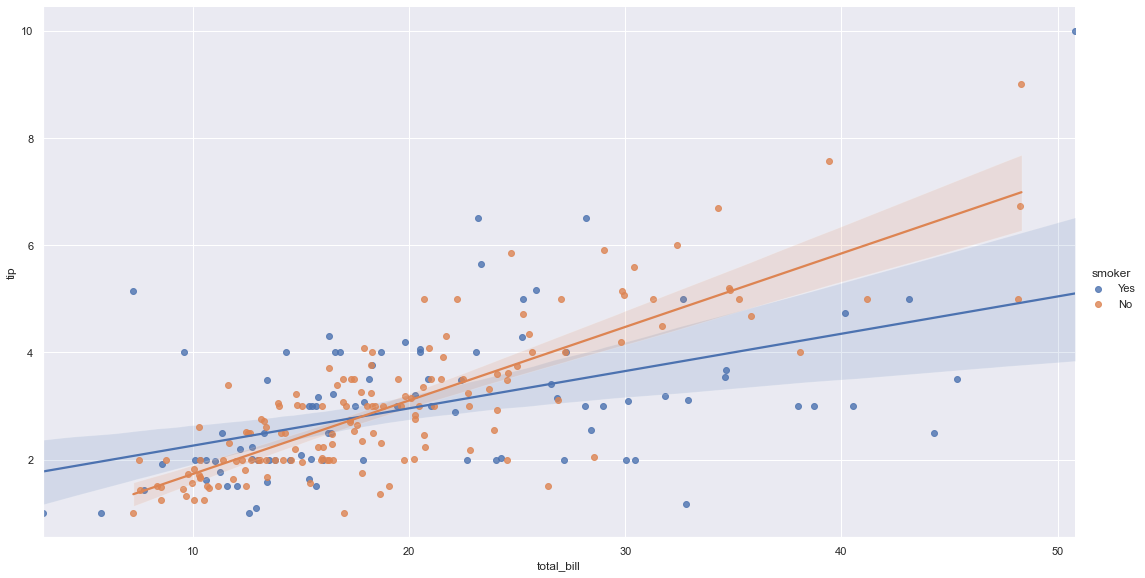

In [21]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips, height= 8, aspect=15/8)

---

# <a style="border: solid; padding:5pt; color:black; background-color:#90CAF9" name="plotly">Plotly</a>

![](../media/Plotly_Logo.png)

## **[Data Visualization Using Plotly: Python’s Visualization Library](https://k21academy.com/datascience/python/data-visualization-using-plotly/)**

By Meenal Sarda.

Plotly is an open-source library that provides a whole set of chart types as well as tools to create dynamic dashboards. You can think of Plotly as a suite of tools as it integrates or extends with libraries such as Dash or Chart Studio to provide interactive dashboards. Plotly’s Python graphing library makes interactive, publication-quality graphs.

**Plotly supports dynamic charts and animations as a first principle and this is the main difference between other visualization libraries like matplotlib or seaborn**.

Main Properties of Plotly:
- It can be used with other languages such as R, Python, Java.
- No JavaScript knowledge is required at all. You code Plotly in your choice of supported languages.
- **Each Plotly visual is a JSON object**. In this way, the visual can be accessed and used in different programming languages.
- With Plotly you can also build dynamic dashboards using Dash extension.
- Chart Studio allows you to create and update the graphics you want without any coding. It has a very simple and useful interface. It is especially useful in areas such as business intelligence.
- Plotly allows you to view the entire dataset in the same figure which is very important for the user experience.
- **Transforming Matplotlib charts to Plotly charts is supported**.
- **Plotly has been added to the Pandas plotting backend with the new version of Pandas. So we can make plotting on Pandas without having to import Plotly Express**.

## **[Plotly Express](https://plotly.com/python/plotly-express/)**
The plotly.express module (usually imported as px) contains functions that can create entire figures at once, and is referred to as Plotly Express or PX. Plotly Express is a built-in part of the plotly library, and is the recommended starting point for creating most common figures.

- Let's import Plotly Express:

In [18]:
import plotly.express as px

- We can create a bar chart by using the **[bar](https://plotly.com/python-api-reference/generated/plotly.express.bar.html)** method:

In [58]:
# Preparing Dataframe
df = logontypebyacc.to_frame(name = 'Frequency')
df.reset_index(inplace = True)
# Creating bar chart
fig = px.bar(df, x = 'LogonType', y = 'Frequency', title = 'Logon Frequency by Logon Type')
# Forcing the X axis to be categorical. Reference: https://plotly.com/python/categorical-axes/
fig.update_xaxes(type='category')
# Presenting chart
fig.show()

- Let's create some visualizations to support the statistical analysis techniques we reviewed yesterday ([Day 1 / Part 3 / Data Analysis with Pandas / Statistics 101](https://github.com/OTRF/infosec-jupyterthon/blob/master/workshops/2021/day1/day1-3-Data-Analysis-with-Pandas%20Intro.ipynb))

In [59]:
import pandas as pd
import json

# Opeing the log file
zeek_data = open('../data/combined_zeek.log','r')
# Creating a list of dictionaries
zeek_list = []
for dict in zeek_data:
    zeek_list.append(json.loads(dict))
# Closing the log file
zeek_data.close()
# Creating a dataframe
zeek_df = pd.DataFrame(data = zeek_list)
zeek_df.head()

@stream              @system @proc            ts                 uid  \
0    conn  bobs.bigwheel.local  zeek  1.588205e+09  Cvf4XX17hSAgXDdGEd   
1    conn  bobs.bigwheel.local  zeek  1.588205e+09  CJ21Le4zsTUcyKKi98   
2    conn  bobs.bigwheel.local  zeek  1.588205e+09  CnOP7t1eGGHf6LFfuk   
3    conn  bobs.bigwheel.local  zeek  1.588205e+09  CvxbPE3MuO7boUdSc8   
4    conn  bobs.bigwheel.local  zeek  1.588205e+09  CuRbE21APSQo2qd6rk   

  id_orig_h  id_orig_p   id_resp_h  id_resp_p proto  ... is_64bit  uses_aslr  \
0  10.0.1.6    54243.0    10.0.0.4       53.0   udp  ...      NaN        NaN   
1  10.0.1.6    56880.0    10.0.0.4      445.0   tcp  ...      NaN        NaN   
2  10.0.1.6    65108.0    10.0.0.4       53.0   udp  ...      NaN        NaN   
3  10.0.1.6      138.0  10.0.1.255      138.0   udp  ...      NaN        NaN   
4  10.0.1.6      123.0    10.0.0.4      123.0   udp  ...      NaN        NaN   

   uses_dep  uses_code_integrity uses_seh  has_import_table has_export_table  \
0       NaN                  NaN      NaN               NaN              NaN   
1       NaN                  NaN      NaN               NaN              NaN   
2       NaN                  NaN      NaN               NaN              NaN   
3       NaN                  NaN      NaN               NaN              NaN   
4       NaN                  NaN      NaN               NaN              NaN   

   has_cert_table  has_debug_data  section_names  
0             NaN             NaN            NaN  
1             NaN             NaN            NaN  
2             NaN             NaN            NaN  
3             NaN             NaN            NaN  
4             NaN             NaN            NaN  

[5 rows x 148 columns]

- We learned how a **histogram** can help us to describe the distribution of frequencies. We can create one to analyze the distribution of frequencies for the network connection **duration** using the **[histogram](https://plotly.com/python-api-reference/generated/plotly.express.histogram.html#plotly.express.histogram)** method.

In [65]:
# Creating histogram chart
fig = px.histogram(zeek_df, x = 'duration', title = 'Distribution of Frequencies', nbins = 1000)
# Presenting chart
fig.show()

- Let's now create a **box plot** to describe the variability of the network connection **duration**. We can use the **[box](https://plotly.com/python-api-reference/generated/plotly.express.box.html#plotly.express.box)** method to create box plots.

In [71]:
# Creating box plot
fig = px.box(zeek_df, x = 'id_resp_h', y = 'duration', title = 'Variability of Duration by Response IP Address')
# Presenting chart
fig.show()

---

# <a style="border: solid; padding:5pt; color:black; background-color:#90CAF9" name="msticpy">MSTICPy visualizations</a>

## Event timeline 

### Basic plots

In [23]:
import msticpy.vis.mp_pandas_plot

net_data = net_full_df.sort_values("FlowStartTime").tail(500)
net_data.mp_plot.timeline(time_column="FlowStartTime")

Loading BokehJS ...

Column(id='8339', ...)

In [24]:
net_data.mp_plot.timeline(
    time_column="FlowStartTime",
    source_columns=["L7Protocol", "RemoteRegion", "AllExtIPs"]
)

Loading BokehJS ...

Column(id='8635', ...)

### Grouping


In [32]:
net_data.mp_plot.timeline(
    time_column="FlowStartTime",
    source_columns=["L7Protocol", "RemoteRegion", "AllExtIPs"],
    group_by="L7Protocol",
)

Loading BokehJS ...

Column(id='10304', ...)

### More parameters


In [26]:
help(net_data.mp_plot.timeline)

Help on method timeline in module msticpy.vis.mp_pandas_plot:

timeline(**kwargs) -> bokeh.models.layouts.LayoutDOM method of msticpy.vis.mp_pandas_plot.MsticpyPlotAccessor instance
    Display a timeline of events.
    
    Parameters
    ----------
    time_column : str, optional
        Name of the timestamp column
        (the default is 'TimeGenerated')
    source_columns : list, optional
        List of default source columns to use in tooltips
        (the default is None)
    
    Other Parameters
    ----------------
    title : str, optional
        Title to display (the default is None)
    alert : SecurityAlert, optional
        Add a reference line/label using the alert time (the default is None)
    ref_event : Any, optional
        Add a reference line/label using the alert time (the default is None)
    ref_time : datetime, optional
        Add a reference line/label using `ref_time` (the default is None)
    group_by : str
        The column to group timelines on.
    

### Event duration


In [27]:
net_data.mp_plot.timeline_duration(group_by="L7Protocol")

Loading BokehJS ...

Column(id='9381', ...)

## Matrix plots

Simple interactions


In [28]:
net_data.mp_plot.matrix(x="RemoteRegion", y="AllExtIPs")

Loading BokehJS ...

Figure(id='9632', ...)

In [33]:
(
    net_data[~net_data["L7Protocol"]
    .isin(["http", "https"])]
    .mp_plot.matrix(x="L7Protocol", y="AllExtIPs", invert=True)
)

Loading BokehJS ...

Figure(id='10603', ...)

In [34]:
net_data.mp_plot.matrix(x="RemoteRegion", y="AllExtIPs", invert=True)

Loading BokehJS ...

Figure(id='10704', ...)

## Process Trees 

In [35]:
process_df = pd.read_pickle("../data/processes_test.pkl")

process_df.mp_plot.process_tree(legend_col="Account")

Loading BokehJS ...

(Figure(id='10806', ...), Row(id='10920', ...))

---
# End of Session
# <font color=peru>Break: 15 Minutes</font>

![](../media/dog-leash-break.jpg)